<h1 align = 'center'> Learning To See </h1>

<h2 align = 'center'> Part 15: Information </h2>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import time
import pickle as pickle
import supportFunctions
import importlib
importlib.reload(supportFunctions)

pickleFileName = 'data/fingerDataSet' + '.pickle'
with open(pickleFileName, 'rb') as pickleFile:
    data = pickle.load(pickleFile, encoding='bytes')

In [3]:
#Return to just using 3 images at training data:
trainingExampleIndices = [7, 30, 46]
trainingExamples = [data[index] for index in trainingExampleIndices]
trainX, trainY = supportFunctions.extractExamplesFromList(trainingExamples, whichImage = b'image1bit', dist = 4)

#And two for testing:
testingExampleIndices = [40, 41]
testingExamples = [data[index] for index in testingExampleIndices]
testX, testY = supportFunctions.extractExamplesFromList(testingExamples, whichImage = b'image1bit', dist = 4)

## Let's use scikit learn's decision tree implementation

In [4]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
clf = clf.fit(trainX, trainY)
yHat = clf.predict(testX)

from sklearn.metrics import confusion_matrix
confusion_matrix(yHat, testY)

array([[4428,  103],
       [ 105,  238]])

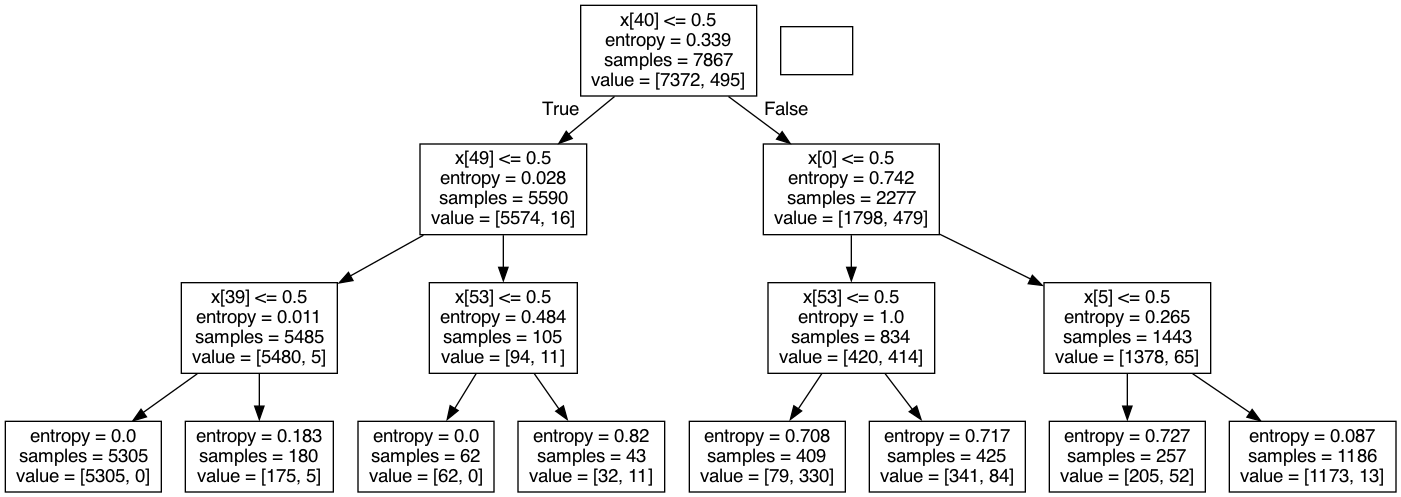

In [5]:
from io import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()  
export_graphviz(clf, out_file=dot_data) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) 

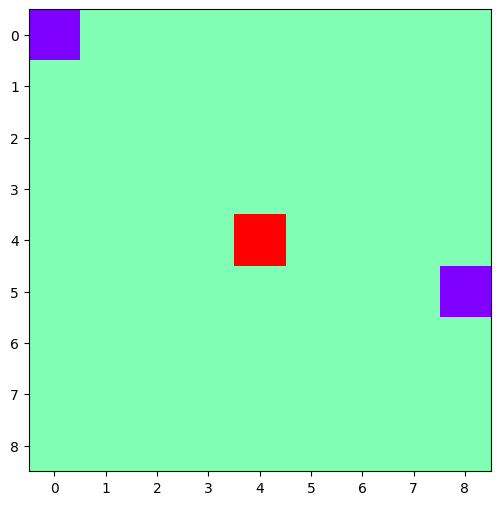

In [8]:
treeRule1 = lambda X: np.logical_and(np.logical_and(X[:, 40] == 1, X[:,0] == 0), X[:, 53] == 0)

ruleVector = np.zeros(81)
ruleVector[40] = 1; ruleVector[0] = -1; ruleVector[53] = -1

fig = plt.figure(0, (6,6))
plt.imshow(ruleVector.reshape(9,9), interpolation = 'none', cmap = 'rainbow')

Confusion Matrix:
[[ 330  165]
 [  79 7293]]
Recall (TPR) = 0.667 (Portion of fingers that we "caught")
Precision (PPV) = 0.807(Portion of predicted finger pixels that were actually finger pixels)
Accuracy = 0.969


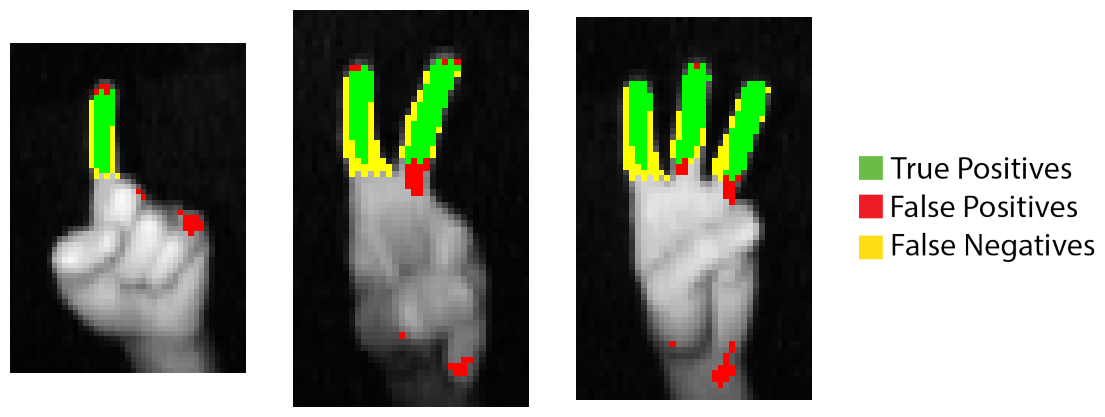

In [10]:
fig = plt.figure(0, (14, 8))
supportFunctions.testLogicalRules(trainingExampleIndices, data, fig, trainX, trainY, treeRule1)

Confusion Matrix:
[[ 238  103]
 [ 105 4428]]
Recall (TPR) = 0.698 (Portion of fingers that we "caught")
Precision (PPV) = 0.694(Portion of predicted finger pixels that were actually finger pixels)
Accuracy = 0.957


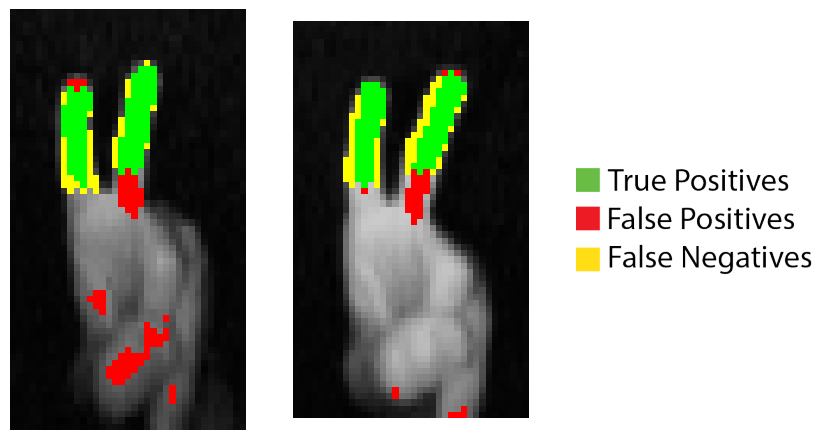

In [11]:
fig = plt.figure(0, (14, 8))
supportFunctions.testLogicalRules(testingExampleIndices, data, fig, testX, testY, treeRule1)

## Just for fun, does GINI come out the same?

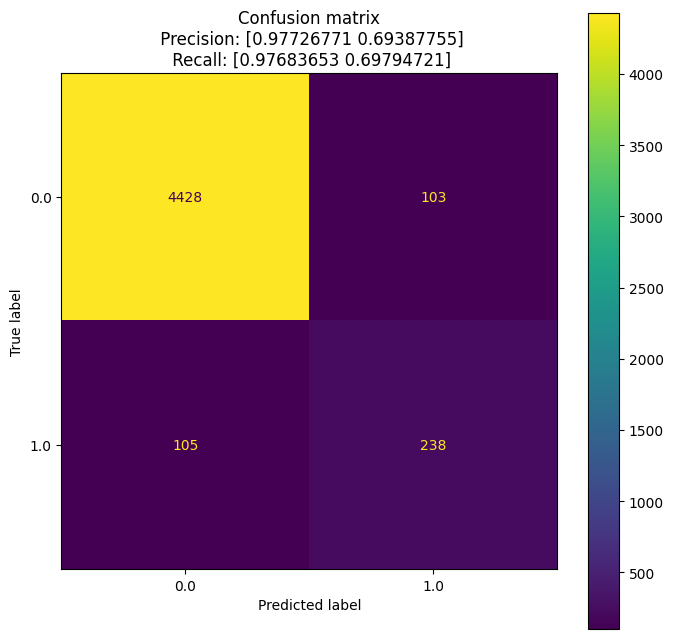

In [19]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
clf = clf.fit(trainX, trainY)
yHat = clf.predict(testX)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yHat, testY)

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score

precision = precision_score(testY, yHat, average=None)
recall = recall_score(testY, yHat, average=None)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=clf.classes_)

fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(ax=ax)
ax.set_title(f'Confusion matrix\n Precision: {precision}\n Recall: {recall}')
plt.show()

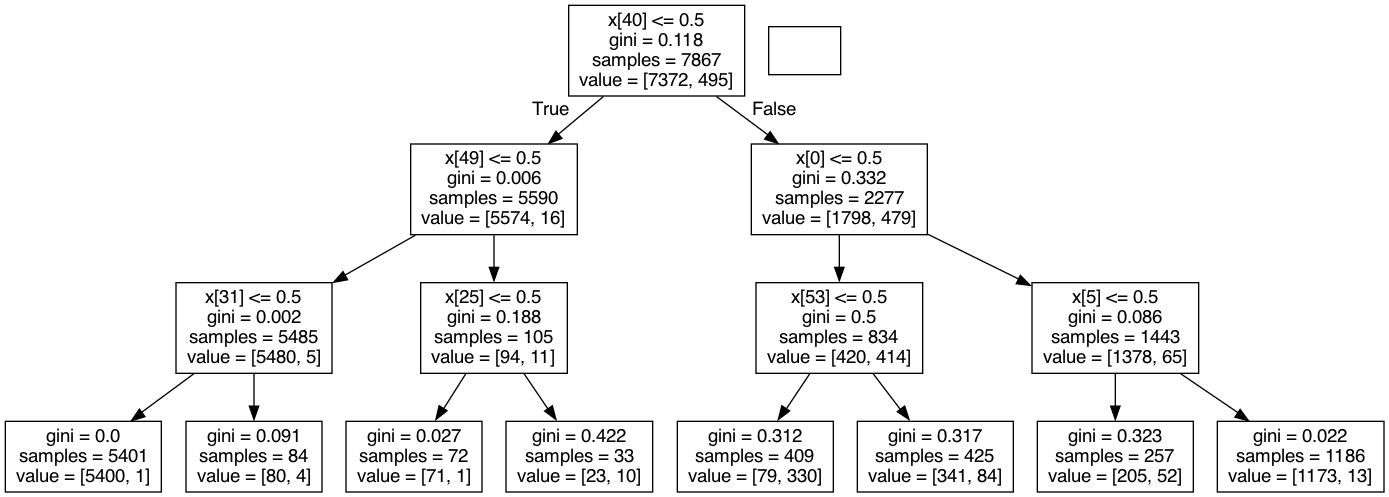

In [13]:
from io import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()  
export_graphviz(clf, out_file=dot_data) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Minor differences, but the rule comes out the same, cool!